# Usando Random Forest - Embedded

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt

In [4]:
#Desabilitando warning
pd.set_option('mode.chained_assignment',None)

In [5]:
#Importando dados
matriculas = pd.read_csv("data/out.csv")

In [6]:
matriculas.shape

(110713, 31)

In [7]:
y = matriculas[['categoria_situacao']]

In [8]:
x = matriculas.iloc[:,range(1,len(matriculas.columns))]

### Nomes dos campos

In [9]:
nomes = list(x.columns.values)

### Convertendo variáveis categóricas em numéricas

In [10]:
le = LabelEncoder()
for n in nomes:
    x[n] = le.fit_transform(x[n])

### Dimensionando Campos com MinMaxScaler

In [11]:
min_max_scaler = MinMaxScaler()
for n in nomes:
    x[[n]] = min_max_scaler.fit_transform(x[[n]])

In [12]:
modelo3 = RandomForestClassifier(n_estimators=20)

In [13]:
modelo3.fit(x,y.values.ravel())

RandomForestClassifier(n_estimators=20)

In [14]:
print(modelo3.feature_importances_)

[0.00973752 0.04630243 0.01181328 0.02217577 0.06642654 0.04848098
 0.11761911 0.01381839 0.01733224 0.11528006 0.00287348 0.0262952
 0.01212793 0.02647481 0.02067573 0.01309779 0.01604699 0.00916636
 0.01052193 0.06022257 0.01230019 0.03671713 0.03056428 0.09817537
 0.03746988 0.02899029 0.0308977  0.02811805 0.01963025 0.01064774]


In [15]:
feat_importances = pd.DataFrame(modelo3.feature_importances_,index = x.columns,columns=['importance']).sort_values('importance', ascending = False)

In [30]:
feat_importances

,importance
data_matricula,0.117619
mes_ocorrencia,0.115280
idade,0.098175
fim_ciclo,0.066427
total_inscritos,0.060223
inicio_ciclo,0.048481
carga_horaria,0.046302
faixa_etaria,0.037470
codigo_unidade_ensino_sistec,0.036717
codigo_municipio_dv,0.030898


<AxesSubplot:>

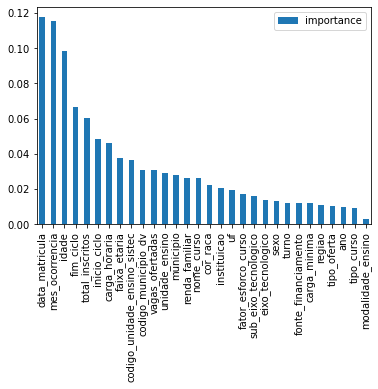

In [17]:
feat_importances.plot(kind='bar')

In [19]:
feat_importances = pd.DataFrame(
            modelo3.feature_importances_,
            index = x.columns,
            columns=['importance']).sort_values('importance', ascending = False)

In [34]:
list(feat_importances.index)[:213]

['data_matricula',
 'mes_ocorrencia',
 'idade',
 'fim_ciclo',
 'total_inscritos',
 'inicio_ciclo',
 'carga_horaria',
 'faixa_etaria',
 'codigo_unidade_ensino_sistec',
 'codigo_municipio_dv',
 'vagas_ofertadas',
 'unidade_ensino',
 'municipio',
 'renda_familiar',
 'nome_curso',
 'cor_raca',
 'instituicao',
 'uf',
 'fator_esforco_curso',
 'sub_eixo_tecnologico',
 'eixo_tecnologico',
 'sexo',
 'turno',
 'fonte_financiamento',
 'carga_minima',
 'regiao',
 'tipo_oferta',
 'ano',
 'tipo_curso',
 'modalidade_ensino']